<a href="https://colab.research.google.com/github/sskamalapurkar/Supervised_ML_Classification_Capstone_Project/blob/main/Credit_card_default_prediction_Sayali_Kamalapurkar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

---



## **This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments**

# **Data Description**


---
**Attribute Information:**

**This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:**

**X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit**

**X2: Gender (1 = male; 2 = female)**

**X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others; 5 = unknown; 6 = unknown)**

**X4: Marital status (1 = married; 2 = single; 3 = others)**

**X5: Age (year)**

**X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:** 

X6 = the repayment status in September, 2005

X7 = the repayment status in August, 2005

X8 = the repayment status in August, 2005

X9 = the repayment status in August, 2005

X10 = the repayment status in August, 2005

X11 = the repayment status in April, 2005

**The measurement scale for the repayment status is: -2 = No consumption; -1 = pay duly; 0 = use of revolving credit (paid minimum only); 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.**

**X12-X17: Amount of bill statement (NT dollar)** 

X12 = amount of bill statement in September, 2005

X13 = amount of bill statement in August, 2005

X14 = amount of bill statement in September, 2005

X15 = amount of bill statement in September, 2005

X16 = amount of bill statement in September, 2005

X17 = amount of bill statement in April, 2005

**X18-X23: Amount of previous payment (NT dollar)**

X18 = amount paid in September, 2005

X19 = amount paid in August, 2005

X20 = amount paid in August, 2005

X21 = amount paid in August, 2005

X22 = amount paid in August, 2005

X23 = amount paid in April, 2005

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
from numpy import math
from datetime import datetime

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

#importing ML Models for classification 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Importing  metrics for evaluation for our models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing dataset
file_path = '/content/drive/MyDrive/Supervised ML - Classification/default of credit card clients.xls'
DataFrame = pd.read_excel(file_path, skiprows = 1)
df = DataFrame.copy()

In [3]:
# let us have a glance at the dataset
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
#Checking number of rows and columns
df.shape

(30000, 25)

**There are 30000 rows and 25 columns in this dataset.**

In [5]:
# printing names of all the columns / features
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [6]:
# getting info about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

**All columns in the dataset are int64 Dtype. This dataset uses 5.7 MB space.**

**Here we see, there are column names which are not giving meanning to the data, they need explanation other than column name. So, firstly we will rename such columns in the dataset.**

In [7]:
df = df.rename(columns={'LIMIT_BAL':'cred_lim','SEX':'gender','PAY_0':'repay_status_sep','PAY_2':'repay_status_aug','PAY_3':'repay_status_jul',
                        'PAY_4':'repay_status_jun','PAY_5':'repay_status_may','PAY_6':'repay_status_apr','BILL_AMT1':'sep_bill',
                        'BILL_AMT2':'aug_bill','BILL_AMT3':'jul_bill','BILL_AMT4':'jun_bill','BILL_AMT5':'may_bill','BILL_AMT6':'apr_bill',
                        'PAY_AMT1':'sep_paid_amt','PAY_AMT2':'aug_paid_amt','PAY_AMT3':'jul_paid_amt','PAY_AMT4':'jun_paid_amt',
                        'PAY_AMT5':'may_paid_amt','PAY_AMT6':'apr_paid_amt','default payment next month':'default'})
df.head()


,ID,cred_lim,gender,EDUCATION,MARRIAGE,AGE,repay_status_sep,repay_status_aug,repay_status_jul,repay_status_jun,...,jun_bill,may_bill,apr_bill,sep_paid_amt,aug_paid_amt,jul_paid_amt,jun_paid_amt,may_paid_amt,apr_paid_amt,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**There are some categorical columns such as - gender, education, marriage, default etc. which are having numerical values in the corresponding columns. Before doing Exploratory Data Analysis on these columns, we will convert those values in the textual data so that we can easily understand and visualize the patterns through EDA.**

In [8]:
#checking for unique values in the columns 'gender', 'education', 'marriage' and 'default'
df.nunique()

ID                  30000
cred_lim               81
gender                  2
EDUCATION               7
MARRIAGE                4
AGE                    56
repay_status_sep       11
repay_status_aug       11
repay_status_jul       11
repay_status_jun       11
repay_status_may       10
repay_status_apr       10
sep_bill            22723
aug_bill            22346
jul_bill            22026
jun_bill            21548
may_bill            21010
apr_bill            20604
sep_paid_amt         7943
aug_paid_amt         7899
jul_paid_amt         7518
jun_paid_amt         6937
may_paid_amt         6897
apr_paid_amt         6939
default                 2
dtype: int64

In [9]:
# renaming values in the categorical columns for better understanding of the data through EDA
df['gender'].replace({1:'Male',2:'Female'},inplace = True)
df['MARRIAGE'].replace({1:'Married',2:'Single',3:'others', 0: 'others'},inplace = True)
df['EDUCATION'].replace({1:'graduate_school',2:'university',3:'high_school',4:'others',5:'others',6:'others', 0:'others'}, inplace = True)
df['default'].replace({0:'No',1:'Yes'}, inplace = True)
df.head()

,ID,cred_lim,gender,EDUCATION,MARRIAGE,AGE,repay_status_sep,repay_status_aug,repay_status_jul,repay_status_jun,...,jun_bill,may_bill,apr_bill,sep_paid_amt,aug_paid_amt,jul_paid_amt,jun_paid_amt,may_paid_amt,apr_paid_amt,default
0,1,20000,Female,university,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Yes
1,2,120000,Female,university,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
2,3,90000,Female,university,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
3,4,50000,Female,university,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
4,5,50000,Male,university,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,No


**Let us now check for null values and further details about the dataset.**

In [10]:
df.isnull().sum()

ID                  0
cred_lim            0
gender              0
EDUCATION           0
MARRIAGE            0
AGE                 0
repay_status_sep    0
repay_status_aug    0
repay_status_jul    0
repay_status_jun    0
repay_status_may    0
repay_status_apr    0
sep_bill            0
aug_bill            0
jul_bill            0
jun_bill            0
may_bill            0
apr_bill            0
sep_paid_amt        0
aug_paid_amt        0
jul_paid_amt        0
jun_paid_amt        0
may_paid_amt        0
apr_paid_amt        0
default             0
dtype: int64

**As we can see, there are no null values in any of the columns.**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                30000 non-null  int64 
 1   cred_lim          30000 non-null  int64 
 2   gender            30000 non-null  object
 3   EDUCATION         30000 non-null  object
 4   MARRIAGE          30000 non-null  object
 5   AGE               30000 non-null  int64 
 6   repay_status_sep  30000 non-null  int64 
 7   repay_status_aug  30000 non-null  int64 
 8   repay_status_jul  30000 non-null  int64 
 9   repay_status_jun  30000 non-null  int64 
 10  repay_status_may  30000 non-null  int64 
 11  repay_status_apr  30000 non-null  int64 
 12  sep_bill          30000 non-null  int64 
 13  aug_bill          30000 non-null  int64 
 14  jul_bill          30000 non-null  int64 
 15  jun_bill          30000 non-null  int64 
 16  may_bill          30000 non-null  int64 
 17  apr_bill    

In [12]:
df.describe()

,ID,cred_lim,AGE,repay_status_sep,repay_status_aug,repay_status_jul,repay_status_jun,repay_status_may,repay_status_apr,sep_bill,...,jul_bill,jun_bill,may_bill,apr_bill,sep_paid_amt,aug_paid_amt,jul_paid_amt,jun_paid_amt,may_paid_amt,apr_paid_amt
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,8660.398374,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,15000.500000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,22500.250000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,30000.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [13]:
df.describe(include = 'object')

,gender,EDUCATION,MARRIAGE,default
count,30000,30000,30000,30000
unique,2,4,3,2
top,Female,university,Single,No
freq,18112,14030,15964,23364


# **Duplicate Values:**

Why is it important to remove duplicate records from my data?

> "Duplication" means that we have repeated data in our dataset. This could be due to things like data entry errors or data collection methods. By removing duplicate values in our data set, time and money are saved by not sending identical communications multiple times to the same person.





In [14]:
# checking for duplicate Values in the dataset
duplicates=len(df[df.duplicated()])
print("The number of duplicate values in the dataset is - ",duplicates)

The number of duplicate values in the dataset is -  0


**There are no duplicate values as well. We are ready to explore and visualize the features with target variable.**

# **EDA on features**

---




# **Univariate Analysis**

---



In [15]:
# Let us check proportion of dependent variable, default in next month
default_df = df['default'].value_counts()
default_df

No     23364
Yes     6636
Name: default, dtype: int64

Text(0.5, 1.0, 'Proportion of defaulters vs non-defaulters')

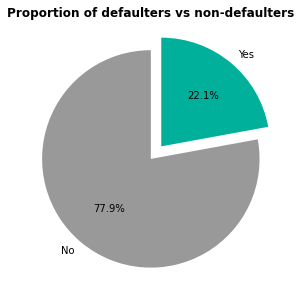

In [16]:
# let's plot pie chart of above data
plt.figure(figsize=(8,5))
plt.pie(default_df, labels = ['No', 'Yes'], autopct='%1.1f%%',explode = [0, 0.15], startangle=90,colors =['#999999', '#00b09b'])
plt.title("Proportion of defaulters vs non-defaulters", weight = 'bold')    #giving title to the chart

From the pie chart, we can easily identify that the credit card default dataset is highly unbalanced. We will deal with this after our EDA is done. By using SMOTE overfitting method, we will balance the dataset for defaulters and non defaulters.

In [17]:
# Let us check proportion of discrete independent variables in the dataset
independent_columns_1 = ['gender', 'EDUCATION', 'MARRIAGE', 'repay_status_sep',
       'repay_status_aug', 'repay_status_jul', 'repay_status_jun', 'repay_status_may', 'repay_status_apr']

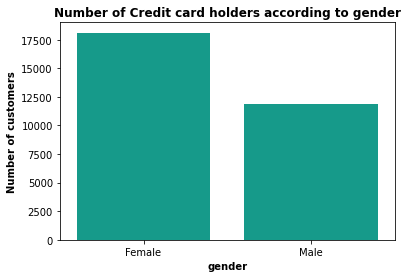

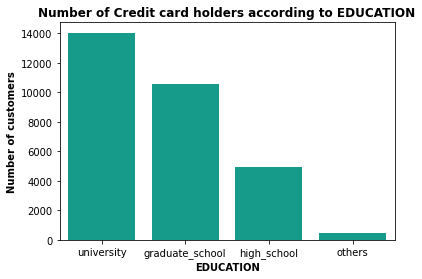

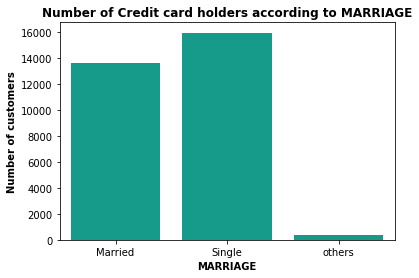

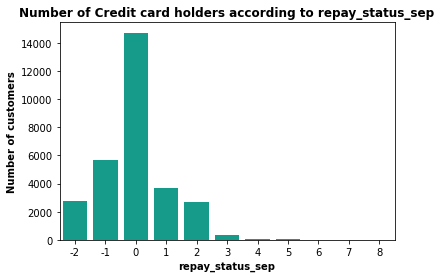

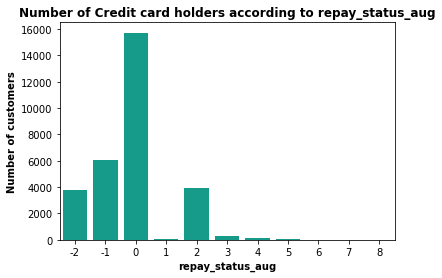

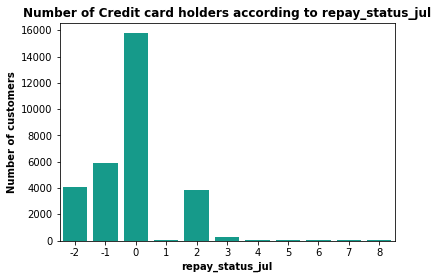

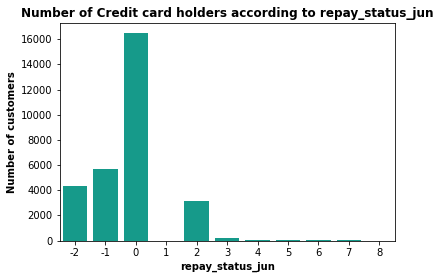

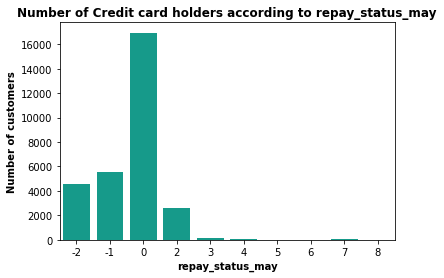

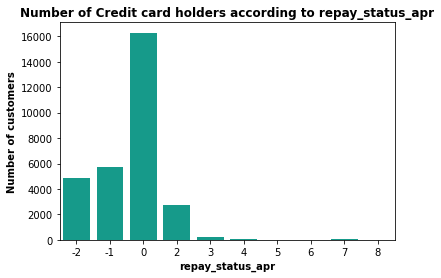

In [18]:
for col in independent_columns_1:
  sns.countplot(x = col, data = df, color = '#00b09b')
  plt.title(f"Number of Credit card holders according to {col}", weight = 'bold')
  plt.ylabel("Number of customers", weight = 'bold')
  plt.xlabel(f"{col}", weight = 'bold')
  plt.show()

In [19]:
# Let us check proportion of continuous independent variables in the dataset
independent_columns_2 = ['cred_lim', 'AGE', 'sep_bill', 'aug_bill', 'jul_bill', 'jun_bill', 'may_bill', 'apr_bill',
                                'sep_paid_amt', 'aug_paid_amt', 'jul_paid_amt', 'jun_paid_amt', 'may_paid_amt', 'apr_paid_amt']

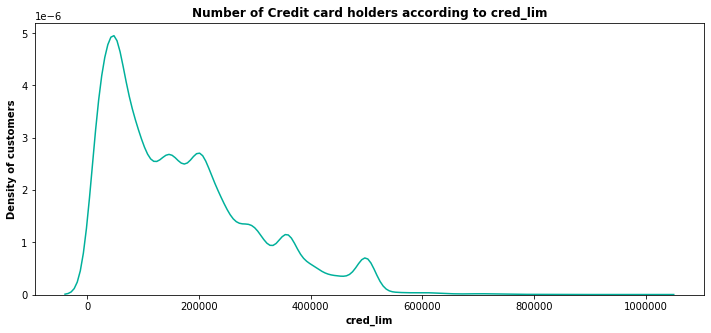

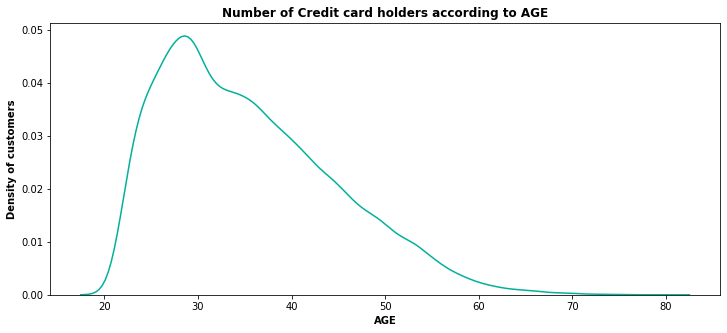

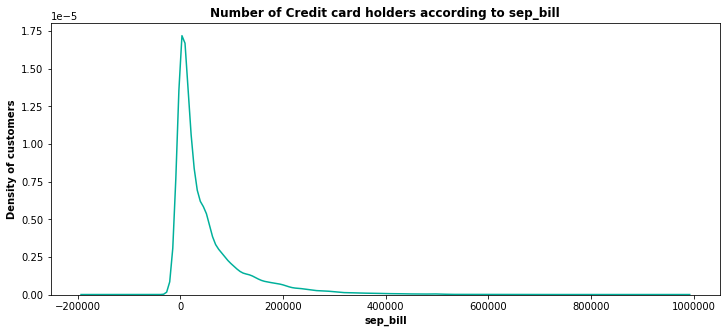

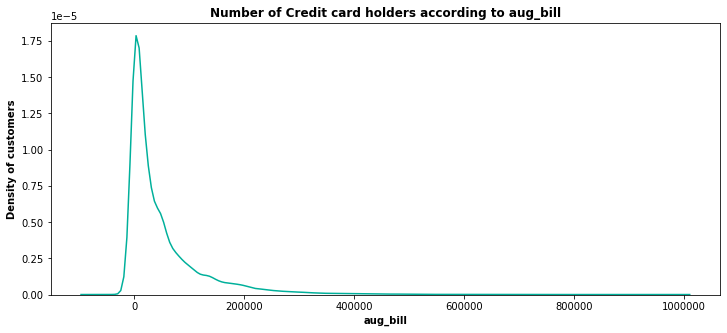

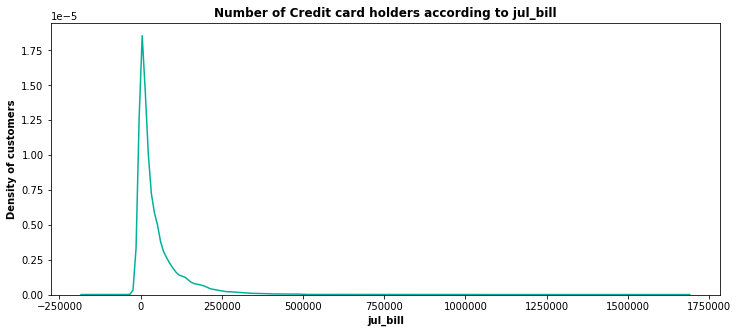

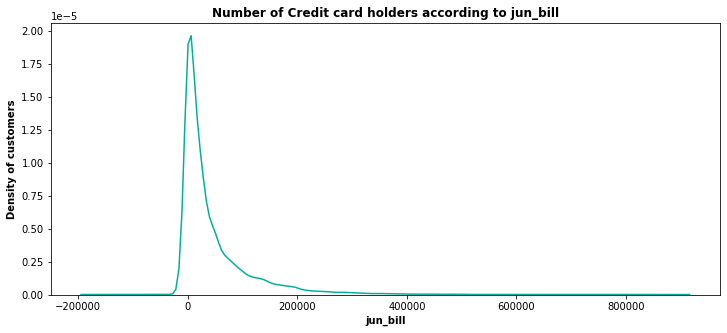

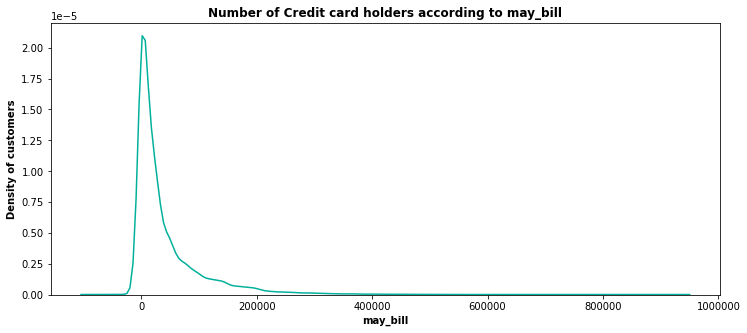

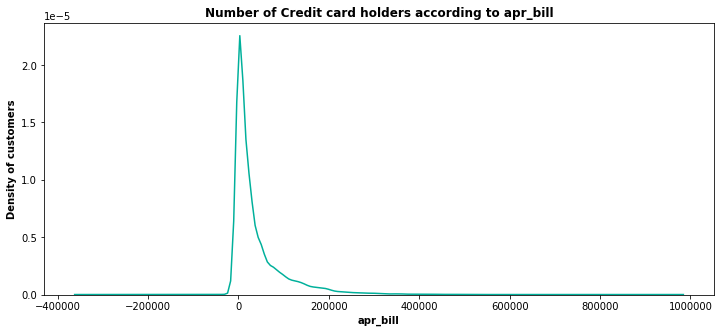

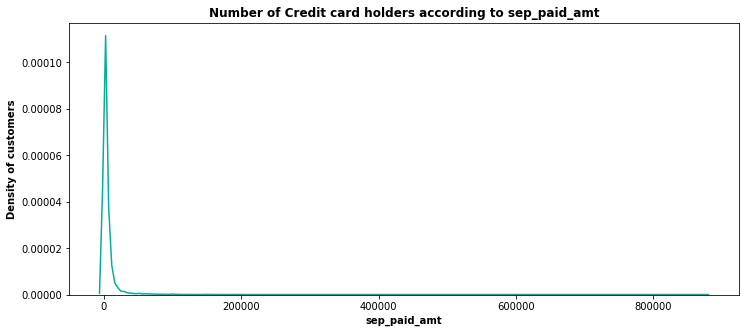

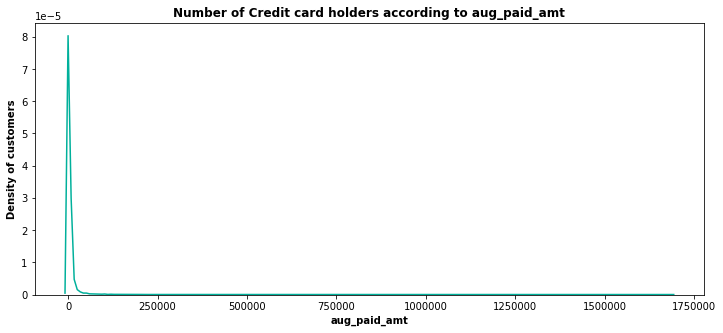

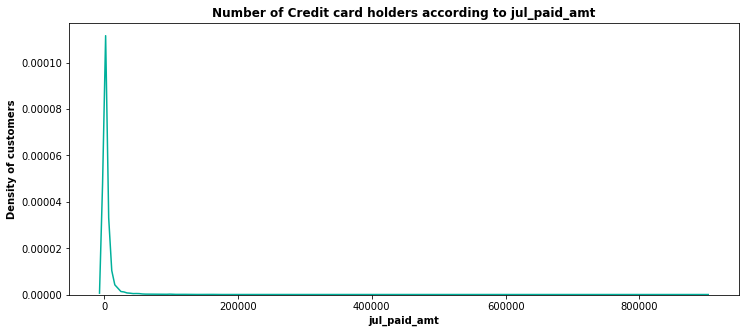

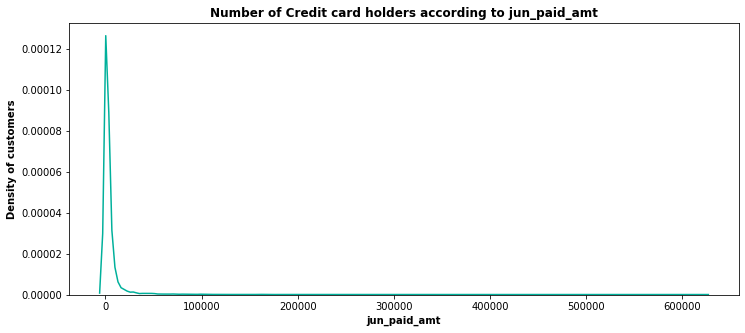

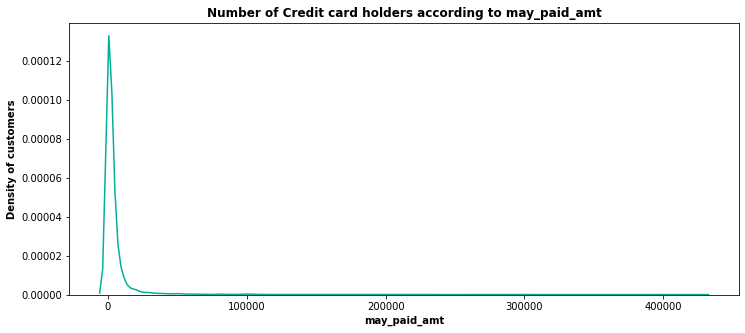

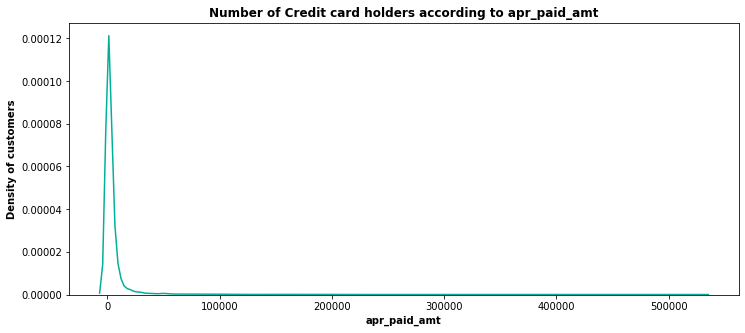

In [20]:
for col in independent_columns_2:
  plt.figure(figsize=(12,5))
  sns.kdeplot(x = col, data = df, color = '#00b09b')
  plt.title(f"Number of Credit card holders according to {col}", weight = 'bold')
  plt.ticklabel_format(style='plain', axis='x')
  plt.ylabel("Density of customers", weight = 'bold')
  plt.xlabel(f"{col}", weight = 'bold')
  plt.show()

# **Observations of Univariate Analysis:**

---

> 1.   There are approx 22% of the customers who will default in next month.
> 2.   There are more female credit card holders than male credit card holders.
> 3. Most of the customers have completed university level, followed by graduate level and then high school level. Very few customers are below that level.
> 4. the customers who have taken credit contains mostly Single people, followed by married people.
> 5. Approx 6000 customers are repaying every month (not necessary same customers, count is overall), and maximum customers are repaying the minimum credit amount only. Further, there are very few customers who are delayed in payment for 3 and more than 3 months.
> 6. This situation, max people repaying the minimum credit amount can be seen in kde plots for density of customers according to monthwise paid amount.
> 7. Maximum customers (more than 70%) are in the range of credit limit 20,000 to 2,50,000.
> 8. It is observed that, generally customers taking credit facility are in the age group 25 to 45 years.

# **Bivariate Analysis:**

---



In [21]:
# let us look at frequency of defaults with respect to gender
gender_df = df.groupby(['gender', 'default']).size().unstack()
gender_df

default,No,Yes
gender,,
Female,14349,3763
Male,9015,2873


<Figure size 864x360 with 0 Axes>

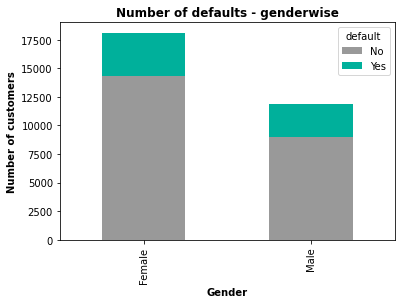

In [22]:
#Fixing bar width for the stacked bar chart
barwidth = 0.7

#Creating a stacked bar chart
plt.figure(figsize=(12,5))
gender_df.plot(kind = 'bar', stacked = True, color =['#999999', '#00b09b'])
#giving title,legend and axes labels
plt.title("Number of defaults - genderwise", weight='bold')
plt.xlabel("Gender", weight='bold')
plt.ylabel("Number of customers",weight='bold')

plt.show()

In [23]:
gender_df1 = df.groupby(['default', 'gender']).size().unstack()

df_total = gender_df1["Female"] + gender_df1["Male"]
gender_df_perc = gender_df1[gender_df1.columns[0:]].div(df_total, 0)*100
gender_df_perc = round(gender_df_perc,1)
print(gender_df_perc)

gender   Female  Male
default              
No         61.4  38.6
Yes        56.7  43.3


**From above stacked bar chart, it can easily understood that female customers are more than male customers in taking credit cards. Also, if we consider percentages of male and female customers who default in next month, then we see that female customers are more likely to default compared to male customers.**

In [24]:
# let us look at frequency of defaults with respect to marriage status
marriage_df = df.groupby(['MARRIAGE','default']).size().unstack()
marriage_df

default,No,Yes
MARRIAGE,,
Married,10453,3206
Single,12623,3341
others,288,89


<Figure size 864x360 with 0 Axes>

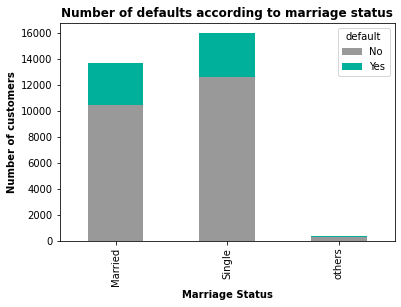

In [25]:
#Fixing bar width for the stacked bar chart
barwidth = 0.7

#Creating a stacked bar chart
plt.figure(figsize=(12,5))
marriage_df.plot(kind = 'bar', stacked = True, color =['#999999', '#00b09b'])
        
#giving title,legend and axes labels
plt.title("Number of defaults according to marriage status", weight='bold')
plt.xlabel("Marriage Status", weight='bold')
plt.ylabel("Number of customers",weight='bold')
plt.show()

In [26]:
marriage_df1 = df.groupby(['default', 'MARRIAGE']).size().unstack()

df_total = marriage_df1["Married"] + marriage_df1["Single"] + marriage_df1["others"]
marriage_df_perc = marriage_df1[marriage_df1.columns[0:]].div(df_total, 0)*100
marriage_df_perc = round(marriage_df_perc,1)
print(marriage_df_perc)

MARRIAGE  Married  Single  others
default                          
No           44.7    54.0     1.2
Yes          48.3    50.3     1.3


**As we can see the same trend in marital status. There are more single customers than married ones, who are taking credit cards, and the defaulter percentage is also higher in single customers.**

In [27]:
# let us look at frequency of defaults with respect to marriage status
education_df = df.groupby(['EDUCATION','default']).size().unstack()
education_df

default,No,Yes
EDUCATION,,
graduate_school,8549,2036
high_school,3680,1237
others,435,33
university,10700,3330


<Figure size 864x360 with 0 Axes>

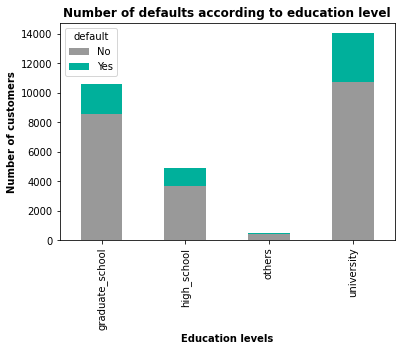

In [28]:
#Fixing bar width for the stacked bar chart
barwidth = 0.7

#Creating a stacked bar chart
plt.figure(figsize=(12,5))
education_df.plot(kind = 'bar', stacked = True, color =['#999999', '#00b09b'])
        
#giving title,legend and axes labels
plt.title("Number of defaults according to education level", weight='bold')
plt.xlabel("Education levels", weight='bold')
plt.ylabel("Number of customers",weight='bold')
plt.show()

In [29]:
education_df1 = df.groupby(['default', 'EDUCATION']).size().unstack()

df_total = education_df1["graduate_school"] + education_df1["high_school"] + education_df1["others"] + education_df1["university"]
education_df_perc = education_df1[education_df1.columns[0:]].div(df_total, 0)*100
education_df_perc = round(education_df_perc,1)
print(education_df_perc)

EDUCATION  graduate_school  high_school  others  university
default                                                    
No                    36.6         15.8     1.9        45.8
Yes                   30.7         18.6     0.5        50.2


**With respect to education level, more educated people are more likely to default in next month. Strange but true!**

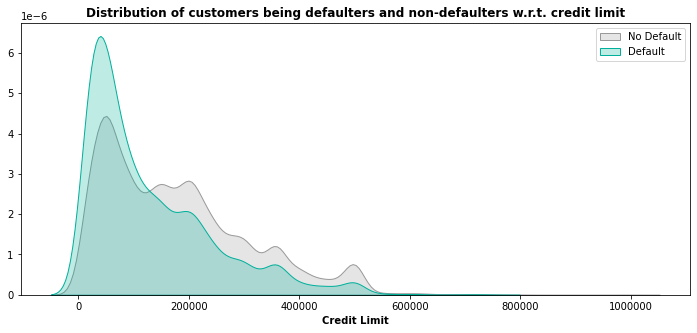

In [30]:
# plotting density chart to understand distribution of defaulters and non-defaulters with respect to 'credit_limit'
plt.figure(figsize=(12,5))
sns.kdeplot(df.loc[(df['default'] == 'No'), 'cred_lim'], label = 'No Default', shade = True, color = '#999999')
sns.kdeplot(df.loc[(df['default'] == 'Yes'), 'cred_lim'], label = 'Default', shade = True, color = '#00b09b')
#giving title and axes labels
plt.title("Distribution of customers being defaulters and non-defaulters w.r.t. credit limit", weight = 'bold')
plt.xlabel("Credit Limit", weight = 'bold')
plt.ticklabel_format(style='plain', axis='x') 
plt.ylabel('')
plt.legend()
plt.show()

**It is observed that defaulter's density is higher for the credit limit between 10,000 to 2,00,000.**

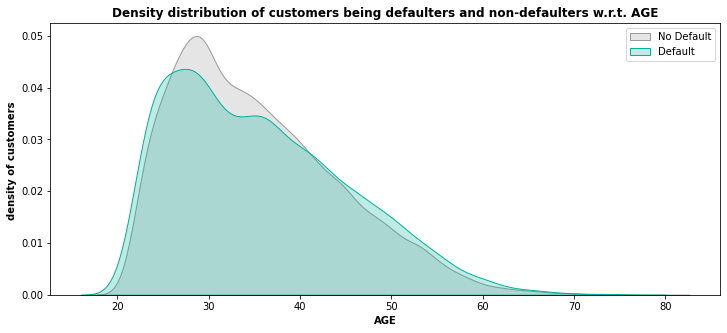

In [31]:
#plotting density chart to understand distribution of defaulters and non-defaulters with respect to 'AGE' of the customers
plt.figure(figsize=(12,5))
sns.kdeplot(df.loc[(df['default'] == 'No'), 'AGE'], label = 'No Default', shade = True, color = '#999999')
sns.kdeplot(df.loc[(df['default'] == 'Yes'), 'AGE'], label = 'Default',shade = True, color = '#00b09b')
#giving title and axes labels
plt.title("Density distribution of customers being defaulters and non-defaulters w.r.t. AGE", weight = 'bold')
plt.xlabel("AGE", weight = 'bold')
plt.ylabel('density of customers ', weight = 'bold')
plt.legend()
plt.show()

**In the age group of 22 to 45 years, there is a higher chance that customer will default in the next month payment.**

Now, we will check if the past six months bill amount will affect the payment default next month or not:

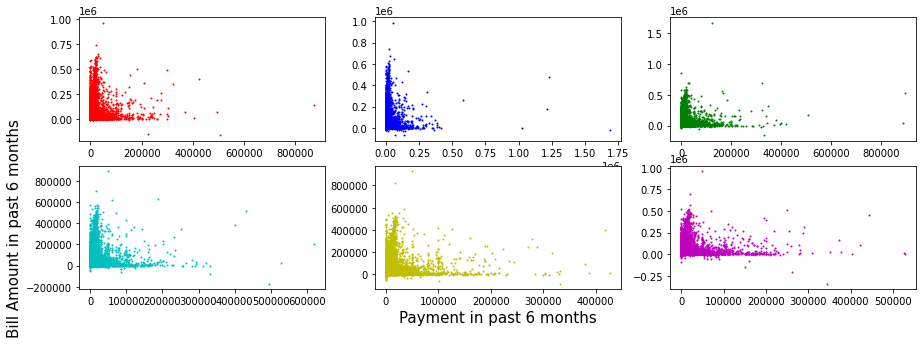

In [32]:
plt.subplots(figsize=(15,5))

plt.subplot(231)
plt.scatter(x=df.sep_paid_amt, y=df.sep_bill, c='r', s=1)

plt.subplot(232)
plt.scatter(x=df.aug_paid_amt, y=df.aug_bill, c='b', s=1)

plt.subplot(233)
plt.scatter(x=df.jul_paid_amt, y=df.jul_bill, c='g', s=1)

plt.subplot(234)
plt.scatter(x=df.jun_paid_amt, y=df.jun_bill, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=15)

plt.subplot(235)
plt.scatter(x=df.may_paid_amt, y=df.may_bill, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=15)

plt.subplot(236)
plt.scatter(x=df.apr_paid_amt, y=df.apr_bill, c='m', s=1)

plt.show()


Above plot indicates that there is higher proportion of clients for whom the bill amount is high but payment done against the same is very low. This we can infer since maximum number of datapoints are closely packed along the Y-axis near to 0 on X-axis.

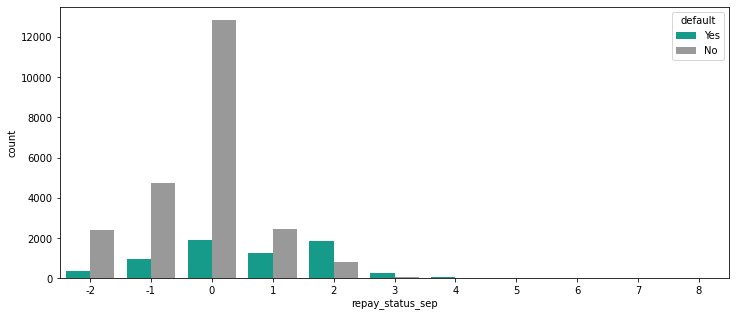

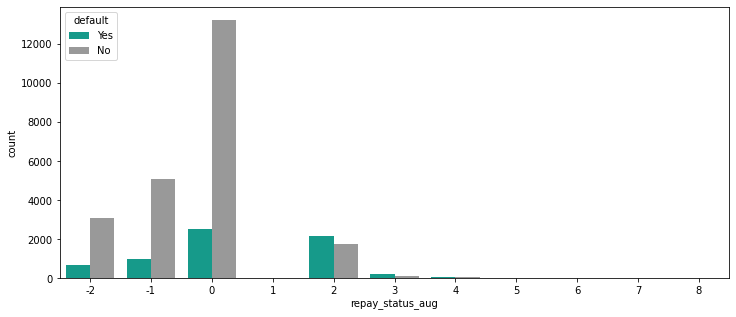

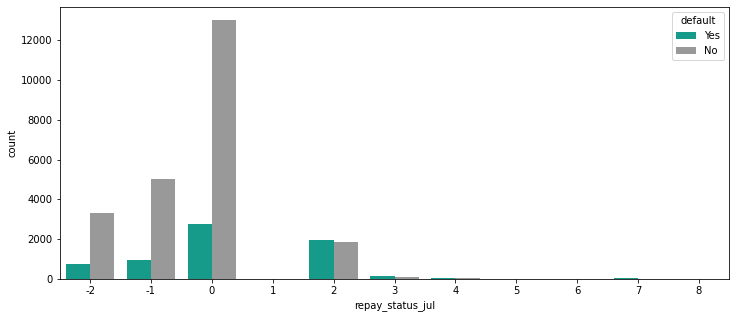

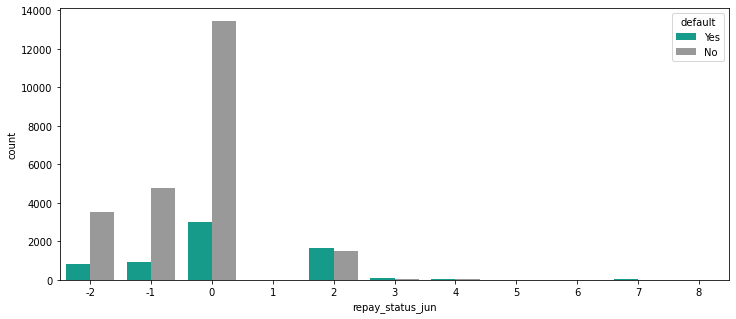

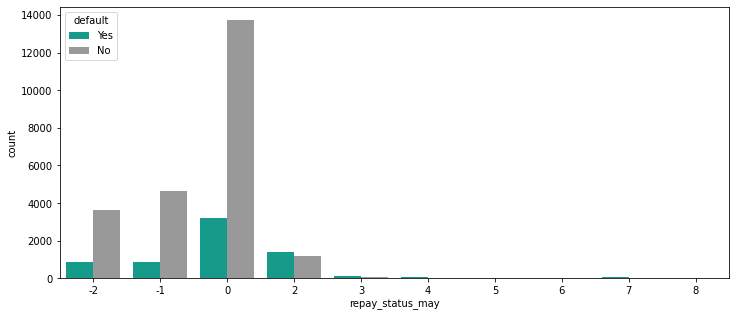

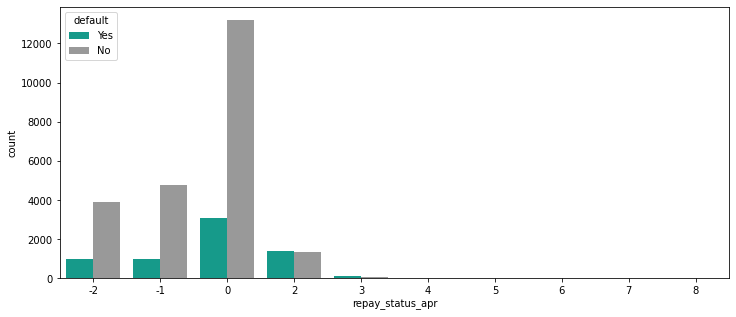

In [33]:
# Looking at the repayment columns for each month with respect to 'default'
repay_list = ['repay_status_sep', 'repay_status_aug', 'repay_status_jul', 'repay_status_jun', 'repay_status_may', 'repay_status_apr']

# Plotting graph for each payment feature.
for col in repay_list:
  plt.figure(figsize=(12,5))
  sns.countplot(x = col, hue = 'default', data = df ,palette = ['#00b09b', '#999999'])



*   **Those who are repaying minimum amount in all the previous months are more likely to default in the next month's payment.**

*   **From April to August, there are almost no customers with payment delay by one month, but there is sudden growth is seen in the month of September for customers delaying by one month.** 

*   **Also, defaulters have increased in September with one and two months payment delay.**



# **Multivariable Analysis:**

---



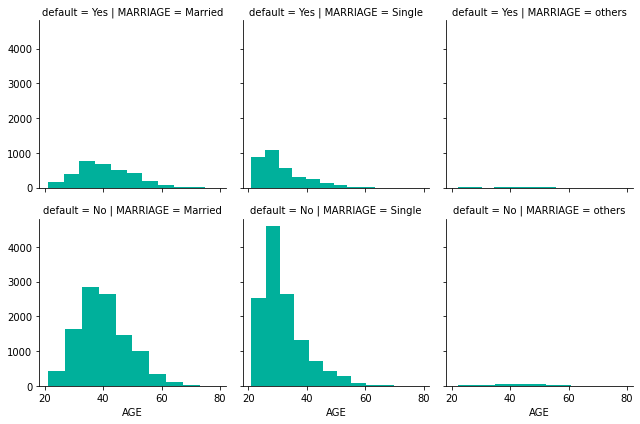

In [34]:
m_a = sns.FacetGrid(df, row='default', col='MARRIAGE')
m_a = m_a.map(plt.hist, 'AGE', color = '#00b09b')
plt.show()

**From above plot we can infer that married customers between age bracket of 30 to 50 and unmarried customers of age 20 to 30 tend to default payment with unmarried customers higher probability to default payment. Hence we can include MARRIAGE feature of customers to find probability of defaulting the payment next month.**

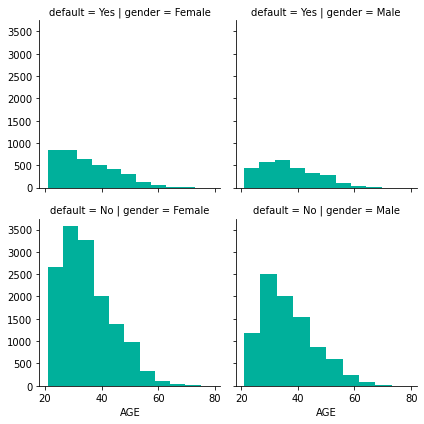

In [35]:
g_a = sns.FacetGrid(df, row='default', col='gender')
g_a = g_a.map(plt.hist, 'AGE', color = '#00b09b')

**It can be seen that females of age group 20-30 have very high tendency to default payment compared to males in all age brackets. Hence we can keep the 'gender' column of customers to predict probability of defaulting payment.**

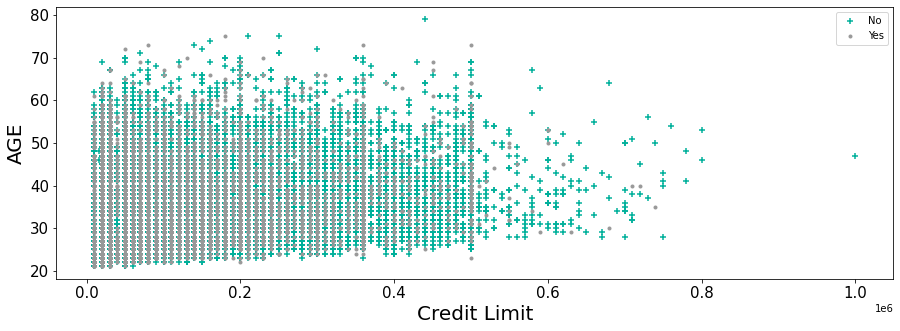

In [36]:
y1 = df.AGE[df["default"] == 'No']
y2 = df.AGE[df["default"] == 'Yes']
x1 = df.cred_lim[df["default"] == 'No']
x2 = df.cred_lim[df["default"] == 'Yes']

fig,ax = plt.subplots(figsize=(15,5))
plt.scatter(x1,y1, color='#00b09b', marker="+", label='No')
plt.scatter(x2,y2, color='#999999', marker=".", label='Yes')
plt.xlabel("Credit Limit", fontsize=20)
plt.ylabel("AGE", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=10)
plt.show()

**Above plot of Age against credit limit does not provide any accurate information, as there is mixed variation of customers of all age groups and their current month credit limit.**


In [37]:
# Importing necessary library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Making function for VIF calculation.

def cal_VIF(F):
 
  
   VIF = pd.DataFrame()
   VIF["variables"] = F.columns
   VIF["VIF"] = [variance_inflation_factor(F.values, i) for i in range(F.shape[1])]

In [38]:
# Checking the VIF score of all the independent variables.

print(cal_VIF(df[[i for i in df.describe().columns]]))

None


**As the variance inflation factor doesn't give any column names means there are no columns with multicollinearity.**

For EDA, we had replaced values in the categorical columns as object, but now again for applying SMOTE oversampling, we need to replace them by values. Let us finish that work first.

In [39]:
df.head()

,ID,cred_lim,gender,EDUCATION,MARRIAGE,AGE,repay_status_sep,repay_status_aug,repay_status_jul,repay_status_jun,...,jun_bill,may_bill,apr_bill,sep_paid_amt,aug_paid_amt,jul_paid_amt,jun_paid_amt,may_paid_amt,apr_paid_amt,default
0,1,20000,Female,university,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Yes
1,2,120000,Female,university,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
2,3,90000,Female,university,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
3,4,50000,Female,university,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
4,5,50000,Male,university,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,No


In [40]:
### Data encoding
#label encoding
encoders_nums = {"gender":{"Male":0,"Female": 1},
                 "default":{"No": 0,"Yes": 1},
                 "MARRIAGE":{"Married": 1, "Single": 2, "others": 3},
                 "EDUCATION":{"graduate_school": 1, "university": 2, "high_school": 3, "others": 4}
                 }

df = df.replace(encoders_nums)

In [41]:
#Let us have a look at the dataset again
df.head()

,ID,cred_lim,gender,EDUCATION,MARRIAGE,AGE,repay_status_sep,repay_status_aug,repay_status_jul,repay_status_jun,...,jun_bill,may_bill,apr_bill,sep_paid_amt,aug_paid_amt,jul_paid_amt,jun_paid_amt,may_paid_amt,apr_paid_amt,default
0,1,20000,1,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,1,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,1,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,1,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,0,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Text(0.5, 1.0, 'Correlation heatmap')

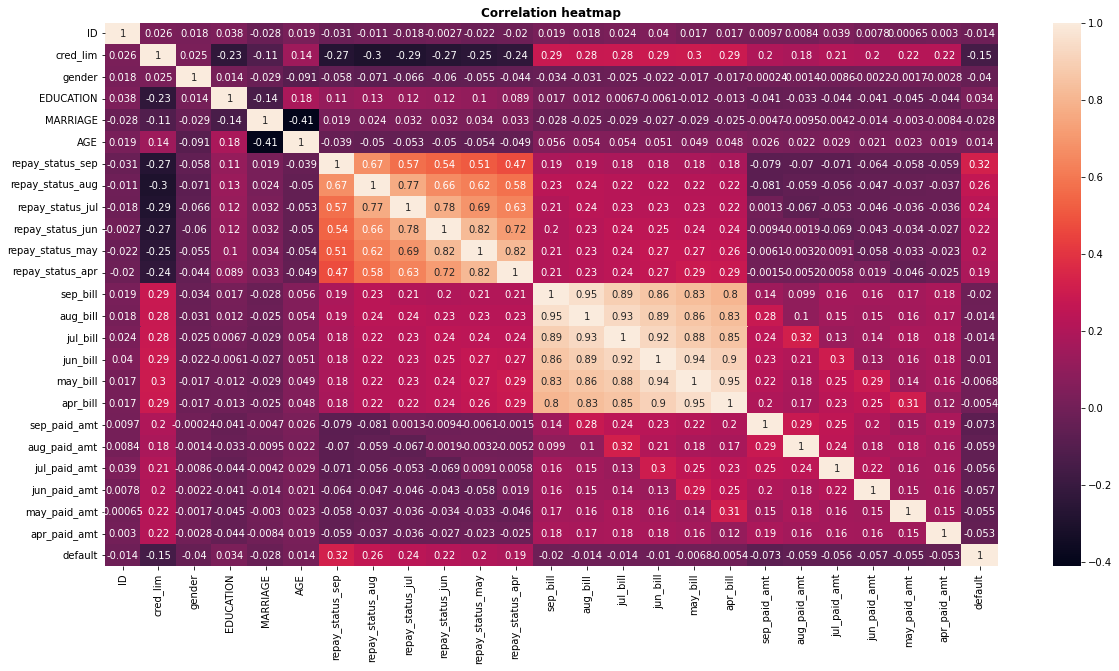

In [42]:
#Checking for correlation between independent variables
corr = df.corr()

plt.figure(figsize = (20,10))
sns.heatmap(corr, annot = True)
plt.title("Correlation heatmap", weight = 'bold')

We can see very high correlation among bill amounts for the past 6 months and also in repay status of the all 6 months. We can remove this correlation by taking total bill amount as one column, where we will add all the bill amounts of past 6 months. 

Further, we will make one single column out of all the monthly paid amount column, named it as paid_total. When we have total billed amount and total paid amount, we can calculate the dues for each customer. In feature engineering, we will be taking care of all these things.

Now firstly, we will be trying to make our dataset balance, as it is highly imbalance. If we continue with such imbalance among the data, we will be in trouble while predicting defaulters.

Let us move ahead for balancing the data for both the classes!

# **Using SMOTE (Synthetic Minority Oversampling Technique) for oversampling** 

> In our data set we have Imbalanced Data Distribution in our dependent variable, it generally happens when observations in one of the class are much higher i.e not defaulter or lower than the other classes i.e defaulter.

> As Machine Learning algorithms tend to increase accuracy by reducing the error, they do not consider the class distribution.

> Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class, and they tend to ignore the minority class. They tend only to predict the majority class, hence, having major misclassification of the minority class in comparison with the majority class. In more technical words, if we have imbalanced data distribution in our dataset then our model becomes more prone to the case when the minority class has a negligible or very lesser recall.

> SMOTE (Synthetic Minority Oversampling Technique) – Oversampling is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them.

In [43]:
#import the module 
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['default'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [44]:
#Let us check the separation of dependent and independent variables
x_smote

,ID,cred_lim,gender,EDUCATION,MARRIAGE,AGE,repay_status_sep,repay_status_aug,repay_status_jul,repay_status_jun,...,jul_bill,jun_bill,may_bill,apr_bill,sep_paid_amt,aug_paid_amt,jul_paid_amt,jun_paid_amt,may_paid_amt,apr_paid_amt
0,1,20000,1,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,1,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,1,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,1,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,0,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,11760,50000,1,1,2,33,1,0,0,0,...,11724,12338,7187,5899,2045,5557,4705,418,1000,901
46724,23864,500579,1,1,2,39,6,5,4,4,...,459262,452662,434790,428934,3014,3318,3297,2602,2656,14097
46725,5017,50000,0,2,1,31,0,0,0,0,...,48376,48698,44437,0,1706,1441,1768,3452,0,0
46726,22538,100000,0,2,1,28,-1,1,-1,1,...,6315,6311,11781,0,86,6315,580,5469,0,2748


In [45]:
columns = list(df.columns)
columns.pop()

'default'

In [46]:
new_df = pd.DataFrame(x_smote, columns=columns)
new_df['default'] = y_smote

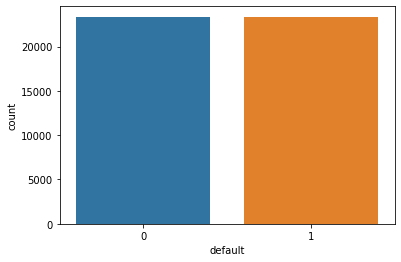

In [47]:
#plot the count plot after smote
sns.countplot('default', data = new_df)

**Now, we have the balanced data. We can move ahead with the feature engineering and model building.**

# **Feature Engineering**

---



In [48]:
#let us combine the amount of credit paid in one 
new_df['paid_total'] = new_df['sep_paid_amt'] + new_df['aug_paid_amt'] + new_df['jul_paid_amt'] + new_df['jun_paid_amt'] + new_df['may_paid_amt'] + new_df['apr_paid_amt']

In [49]:
#check the correlation by using mean
new_df.groupby('default')['paid_total'].mean()

default
0    34969.420647
1    18203.016735
Name: paid_total, dtype: float64

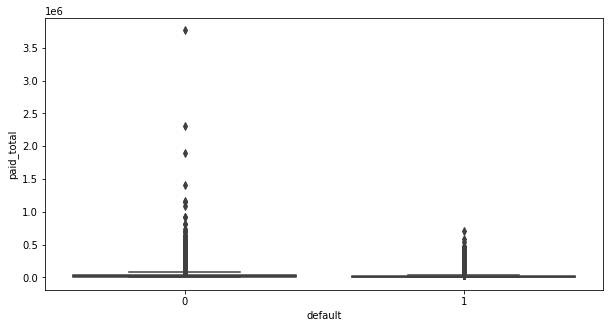

In [50]:
#plotting the box plot 
plt.figure(figsize=(10,5))
sns.boxplot(data = new_df, x = 'default', y = 'paid_total' )

We are not going to remove outliers, as in this dataset we have to find defaulter, which can be an outlier too.

In [51]:
#create a new column dues by calculating the sum of total bill amount and then substract the total amount paid from it.
new_df['total_bill'] = (new_df['apr_bill'] + new_df['may_bill'] + new_df['jun_bill'] + new_df['jul_bill'] + new_df['aug_bill'] + new_df['sep_bill'])
new_df['Dues'] =  new_df['total_bill'] - new_df['paid_total']

In [52]:
#check the mean to calculate the correletion 
new_df.groupby('default')['Dues'].mean()

default
0    237459.487203
1    240629.007191
Name: Dues, dtype: float64

In [53]:
new_df.replace({'gender': {0:'Male',1:'Female'}, 'EDUCATION':{1 : 'graduate_school', 2 : 'university', 3 : 'high_school', 4 : 'others'},
                        'MARRIAGE':{1 : 'Married', 2 : 'Single', 3 : 'others'}}, inplace = True)

In [54]:
new_df.head()

,ID,cred_lim,gender,EDUCATION,MARRIAGE,AGE,repay_status_sep,repay_status_aug,repay_status_jul,repay_status_jun,...,sep_paid_amt,aug_paid_amt,jul_paid_amt,jun_paid_amt,may_paid_amt,apr_paid_amt,default,paid_total,total_bill,Dues
0,1,20000,Female,university,Married,24,2,2,-1,-1,...,0,689,0,0,0,0,1,689,7704,7015
1,2,120000,Female,university,Single,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,5000,17077,12077
2,3,90000,Female,university,Single,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,11018,101653,90635
3,4,50000,Female,university,Married,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,8388,231334,222946
4,5,50000,Male,university,Married,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,59049,109339,50290


# **One hot encoding**

**One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.**


**Here we perform one hot encoding on 'EDUCATION', 'MARRIAGE', 'gender', 'repay_status_sep', 'repay_status_aug', 'repay_status_jul', 'repay_status_jun', 'repay_status_may', 'repay_status_apr'**

In [55]:
#get dummies 
new_df = pd.get_dummies(new_df,columns=['EDUCATION','MARRIAGE', 'gender'], prefix = ['ed', 'marriage', 'sex'])

In [56]:
#get dummies
new_df = pd.get_dummies(new_df, columns = ['repay_status_sep', 'repay_status_aug', 'repay_status_jul', 'repay_status_jun', 'repay_status_may', 'repay_status_apr'], drop_first = True )


**As there is no use of ID column, we will drop the column. Also, we have sum up bill amount of all the months and paid amount by customers in all the months, we can drop those 12 columns as well.**

In [57]:
new_df.drop('ID',axis = 1, inplace = True)
new_df.drop(['apr_bill','may_bill','jun_bill','jul_bill','aug_bill','sep_bill'],axis = 1, inplace = True)
new_df.drop(['apr_paid_amt','may_paid_amt','jun_paid_amt','jul_paid_amt','aug_paid_amt','sep_paid_amt'], axis = 1, inplace = True)

In [58]:
new_df.shape

(46728, 75)

In [59]:
new_df.head()

,cred_lim,AGE,default,paid_total,total_bill,Dues,ed_graduate_school,ed_high_school,ed_others,ed_university,...,repay_status_apr_-1,repay_status_apr_0,repay_status_apr_1,repay_status_apr_2,repay_status_apr_3,repay_status_apr_4,repay_status_apr_5,repay_status_apr_6,repay_status_apr_7,repay_status_apr_8
0,20000,24,1,689,7704,7015,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,120000,26,1,5000,17077,12077,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,90000,34,0,11018,101653,90635,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,50000,37,0,8388,231334,222946,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,50000,57,0,59049,109339,50290,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


**Thats it! Now we are ready for train test split and further model implementation.**

# **Train test split**

---



In [60]:
X = new_df.drop('default',axis=1)
y = new_df['default']

In [61]:
#standardise the x value by using satandardscaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [62]:
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.3, random_state = 42) 
print(X_train.shape)
print(X_test.shape)

(32709, 74)
(14019, 74)


# **Logistic Regression model**

---

Steps involved:

Logistic Regression Classifier Generator

Logistic Regression Hyper Parameter Tuning using GridSearch

Getting optimized Logistic Regression model

In [63]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [64]:
#evaluate the model on train data
y_pred_train = model.predict(X_train)

accuracy_score_train = accuracy_score(y_pred_train,y_train) *100
precision_score_train = precision_score(y_pred_train,y_train) *100
recall_score_train = recall_score(y_pred_train,y_train) *100

print("The accuracy on train data is ", accuracy_score_train)
print("The precision on train data is ", precision_score_train)
print("The recall on train data is ", recall_score_train)

#confusion matrix
CM = confusion_matrix(y_pred_train,y_train)
print(f"Confusion Matrix : \n {CM}")

The accuracy on train data is  75.23311626769392
The precision on train data is  68.7217125382263
The recall on train data is  78.99880475286508
Confusion Matrix : 
 [[13372  5114]
 [ 2987 11236]]


In [65]:
#evaluate the model on test data
y_pred_test = model.predict(X_test)

accuracy_score_test = accuracy_score(y_pred_test,y_test) *100
precision_score_test = precision_score(y_pred_test,y_test) *100
recall_score_test = recall_score(y_pred_test,y_test) *100

print("The accuracy on test data is ", accuracy_score_test)
print("The precision on test data is ", precision_score_test)
print("The recall on test data is ", recall_score_test)

#confusion matrix
CM = confusion_matrix(y_pred_test,y_test)
print(f"Confusion Matrix : \n {CM}")

The accuracy on test data is  74.57022612169199
The precision on test data is  68.07812945537496
The recall on test data is  78.26585805605639
Confusion Matrix : 
 [[5679 2239]
 [1326 4775]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

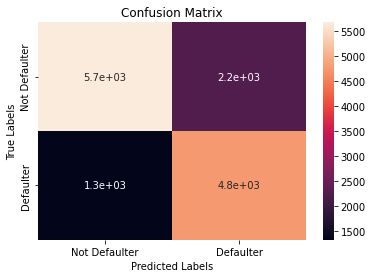

In [66]:
#plotting confusion matrix
ax= plt.subplot()
sns.heatmap(CM, annot=True, ax = ax)

# labels, title and ticks
labels = ['Not Defaulter', 'Defaulter']
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**Hyperparameter tuning using GridSearchCV**

In [67]:
#setting up the parameter for GridSearch CV
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

lr_grid_model= GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, scoring = 'recall', n_jobs = -1, verbose = 3, cv = 3)
lr_grid_model.fit(X_train, y_train) 

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='recall', verbose=3)

In [68]:
#optimized model
optimized_lr_model = lr_grid_model.best_estimator_
optimized_lr_model

LogisticRegression(C=1, class_weight='balanced')

In [69]:
#finding best parameters
lr_grid_model.best_params_

{'C': 1, 'penalty': 'l2'}

In [70]:
#evaluate the model on train data
y_pred_train = optimized_lr_model.predict(X_train)

accuracy_score_train = accuracy_score(y_pred_train,y_train) *100
precision_score_train = precision_score(y_pred_train,y_train) *100
recall_score_train = recall_score(y_pred_train,y_train) *100

print("The accuracy on train data is ", accuracy_score_train)
print("The precision on train data is ", precision_score_train)
print("The recall on train data is ", recall_score_train)

#confusion matrix
CM = confusion_matrix(y_pred_train,y_train)
print(f"Confusion Matrix : \n {CM}")

The accuracy on train data is  75.23617353022104
The precision on train data is  68.73394495412845
The recall on train data is  78.9962041332771
Confusion Matrix : 
 [[13371  5112]
 [ 2988 11238]]


In [71]:
#evaluate the model on test data
y_pred_test = optimized_lr_model.predict(X_test)

accuracy_score_test = accuracy_score(y_pred_test,y_test) *100
precision_score_test = precision_score(y_pred_test,y_test) *100
recall_score_test = recall_score(y_pred_test,y_test) *100

print("The accuracy on test data is ", accuracy_score_test)
print("The precision on test data is ", precision_score_test)
print("The recall on test data is ", recall_score_test)

#confusion matrix
CM = confusion_matrix(y_pred_test,y_test)
print(f"Confusion Matrix : \n {CM}")

The accuracy on test data is  74.56309294528853
The precision on test data is  68.07812945537496
The recall on test data is  78.2530317928548
Confusion Matrix : 
 [[5678 2239]
 [1327 4775]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

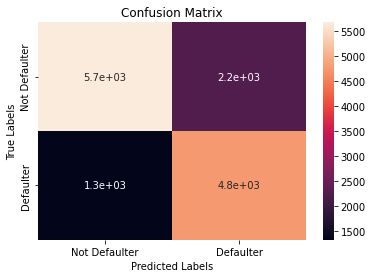

In [72]:
#plotting confusion matrix
ax= plt.subplot()
sns.heatmap(CM, annot=True, ax = ax)

# labels, title and ticks
labels = ['Not Defaulter', 'Defaulter']
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **Decision Tree Classifier**

---

Steps involved:

Decision tree Classifier Generator

Decision tree Hyper Parameter Tuning using GridSearch

Getting optimized Decision tree classifier model

Evaluating the optimized model using Accuracy, Precision, Recall and Confusion Matrix

Plotting the feature importance according to the Decision Tree Classifier

In [73]:
#create an instance of the estimator
class_tree = DecisionTreeClassifier(min_samples_split= 30, min_samples_leaf= 10, random_state= 10)

In [74]:
 #using training data to train the estimator
 class_tree.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=30,
                       random_state=10)

In [75]:
#evaluate the model on train data
y_pred_train = class_tree.predict(X_train)

accuracy_score_train = accuracy_score(y_pred_train,y_train) *100
precision_score_train = precision_score(y_pred_train,y_train) *100
recall_score_train = recall_score(y_pred_train,y_train) *100

print("The accuracy on train data is ", accuracy_score_train)
print("The precision on train data is ", precision_score_train)
print("The recall on train data is ", recall_score_train)

#confusion matrix
CM = confusion_matrix(y_pred_train,y_train)
print(f"Confusion Matrix : \n {CM}")

The accuracy on train data is  83.23091503867437
The precision on train data is  80.64220183486238
The recall on train data is  85.03708481135118
Confusion Matrix : 
 [[14039  3165]
 [ 2320 13185]]


In [76]:
#evaluate the model on test data
y_pred_test = class_tree.predict(X_test)

accuracy_score_test = accuracy_score(y_pred_test,y_test) *100
precision_score_test = precision_score(y_pred_test,y_test) *100
recall_score_test = recall_score(y_pred_test,y_test) *100

print("The accuracy on test data is ", accuracy_score_test)
print("The precision on test data is ", precision_score_test)
print("The recall on test data is ", recall_score_test)

#confusion matrix
CM = confusion_matrix(y_pred_test,y_test)
print(f"Confusion Matrix : \n {CM}")

The accuracy on test data is  74.0138383622227
The precision on test data is  71.5854006273168
The recall on test data is  75.26607704991756
Confusion Matrix : 
 [[5355 1993]
 [1650 5021]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

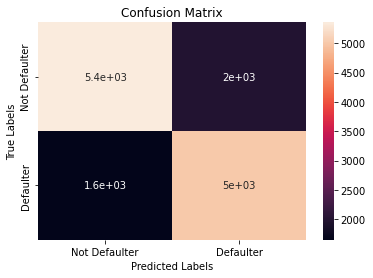

In [77]:
#plotting confusion matrix
ax= plt.subplot()
sns.heatmap(CM, annot=True, ax = ax)

# labels, title and ticks
labels = ['Not Defaulter', 'Defaulter']
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**Hyperparameter tuning using GridSearchCV**

In [78]:
#parameters for decision tree
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}

In [79]:
#using training data to train the estimator
dt_grid_model = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
dt_grid_model.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 50, 100],
                         'min_samples_split': [0.1, 0.2, 0.4]},
             scoring='accuracy', verbose=3)

In [80]:
#optimized model
optimized_dt_model = dt_grid_model.best_estimator_
optimized_dt_model

DecisionTreeClassifier(max_depth=20, min_samples_split=0.1)

In [81]:
#evaluate the model on train data
y_pred_train = optimized_dt_model.predict(X_train)

accuracy_score_train = accuracy_score(y_pred_train,y_train) *100
precision_score_train = precision_score(y_pred_train,y_train) *100
recall_score_train = recall_score(y_pred_train,y_train) *100

print("The accuracy on train data is ", accuracy_score_train)
print("The precision on train data is ", precision_score_train)
print("The recall on train data is ", recall_score_train)

#confusion matrix
CM = confusion_matrix(y_pred_train,y_train)
print(f"Confusion Matrix : \n {CM}")

The accuracy on train data is  70.25283561099391
The precision on train data is  70.99082568807339
The recall on train data is  69.94696878389779
Confusion Matrix : 
 [[11372  4743]
 [ 4987 11607]]


In [82]:
#evaluate the model on test data
y_pred_test = optimized_dt_model.predict(X_test)

accuracy_score_test = accuracy_score(y_pred_test,y_test) *100
precision_score_test = precision_score(y_pred_test,y_test) *100
recall_score_test = recall_score(y_pred_test,y_test) *100

print("The accuracy on test data is ", accuracy_score_test)
print("The precision on test data is ", precision_score_test)
print("The recall on test data is ", recall_score_test)

#confusion matrix
CM = confusion_matrix(y_pred_test,y_test)
print(f"Confusion Matrix : \n {CM}")

The accuracy on test data is  68.99921535059562
The precision on test data is  70.25948103792416
The recall on test data is  68.55870895937673
Confusion Matrix : 
 [[4745 2086]
 [2260 4928]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

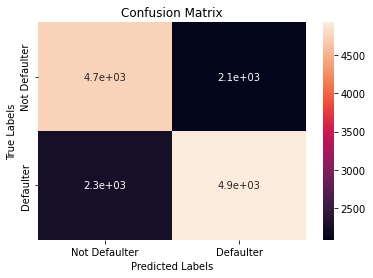

In [83]:
#plotting confusion matrix
ax= plt.subplot()
sns.heatmap(CM, annot=True, ax = ax)

# labels, title and ticks
labels = ['Not Defaulter', 'Defaulter']
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**Feature Importance**

In [84]:
features = new_df.drop('default',axis=1)
importances = optimized_dt_model.feature_importances_
feature_imp = pd.Series(importances,index=features.columns).nlargest(10, keep = 'first')
feature_imp

repay_status_aug_2     0.241889
repay_status_aug_1     0.240542
sex_Female             0.140694
marriage_Married       0.120815
paid_total             0.118297
repay_status_sep_2     0.033763
repay_status_jul_-1    0.018179
ed_high_school         0.016826
repay_status_may_1     0.015539
repay_status_apr_1     0.015498
dtype: float64

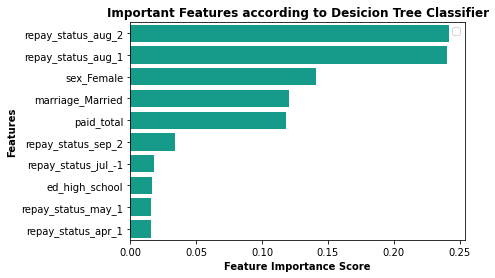

In [85]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index, color = '#00b09b')
# Add labels to your graph
plt.xlabel('Feature Importance Score', weight = 'bold')
plt.ylabel('Features', weight = 'bold')
plt.title("Important Features according to Desicion Tree Classifier", weight = 'bold')
plt.legend()
plt.show()

# **Random Forest Classifier**

---

Steps involved:

Random Forest Classifier Generator

Random Forest Hyper Parameter Tuning using GridSearch

Getting optimized Random Forest classifier model

Evaluating the optimized model using Accuracy, Precision, Recall and Confusion Matrix

Plotting the feature importance according to the Random Forest Classifier

In [86]:
#Create a Gaussian Classifier
rf_model = RandomForestClassifier(n_estimators=100)

In [87]:
#using training data to train the estimator
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [88]:
#evaluate the model on train data
y_pred_train = rf_model.predict(X_train)

accuracy_score_train = accuracy_score(y_pred_train,y_train) *100
precision_score_train = precision_score(y_pred_train,y_train) *100
recall_score_train = recall_score(y_pred_train,y_train) *100

print("The accuracy on train data is ", accuracy_score_train)
print("The precision on train data is ", precision_score_train)
print("The recall on train data is ", recall_score_train)

#confusion matrix
CM = confusion_matrix(y_pred_train,y_train)
print(f"Confusion Matrix : \n {CM}")

The accuracy on train data is  99.94191201198447
The precision on train data is  99.95107033639144
The recall on train data is  99.93273405491348
Confusion Matrix : 
 [[16348     8]
 [   11 16342]]


In [89]:
#evaluate the model on test data
y_pred_test = rf_model.predict(X_test)

accuracy_score_test = accuracy_score(y_pred_test,y_test) *100
precision_score_test = precision_score(y_pred_test,y_test) *100
recall_score_test = recall_score(y_pred_test,y_test) *100

print("The accuracy on test data is ", accuracy_score_test)
print("The precision on test data is ", precision_score_test)
print("The recall on test data is ", recall_score_test)

#confusion matrix
CM = confusion_matrix(y_pred_test,y_test)
print(f"Confusion Matrix : \n {CM}")

The accuracy on test data is  81.01148441400956
The precision on test data is  77.92985457656117
The recall on test data is  83.06990881458967
Confusion Matrix : 
 [[5891 1548]
 [1114 5466]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

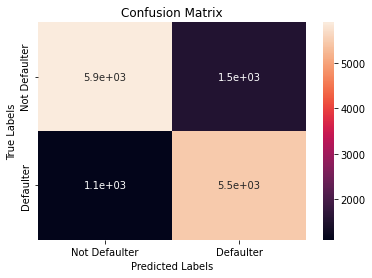

In [90]:
#plotting confusion matrix
ax= plt.subplot()
sns.heatmap(CM, annot=True, ax = ax)

# labels, title and ticks
labels = ['Not Defaulter', 'Defaulter']
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**Hyperparameter tuning using GridSearchCV**

In [91]:
#setting the parameters
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

In [92]:
#using training data to train the estimator
rf_grid_model = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
rf_grid_model.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [93]:
#optimized model
optimized_rf_model = rf_grid_model.best_estimator_

In [94]:
#evaluate the model on train data
y_pred_train = optimized_rf_model.predict(X_train)

accuracy_score_train = accuracy_score(y_pred_train,y_train) *100
precision_score_train = precision_score(y_pred_train,y_train) *100
recall_score_train = recall_score(y_pred_train,y_train) *100

print("The accuracy on train data is ", accuracy_score_train)
print("The precision on train data is ", precision_score_train)
print("The recall on train data is ", recall_score_train)

#confusion matrix
CM = confusion_matrix(y_pred_train,y_train)
print(f"Confusion Matrix : \n {CM}")

The accuracy on train data is  99.48026537038736
The precision on train data is  99.16819571865445
The recall on train data is  99.79074347612014
Confusion Matrix : 
 [[16325   136]
 [   34 16214]]


In [95]:
#evaluate the model on test data
y_pred_test = optimized_rf_model.predict(X_test)

accuracy_score_test = accuracy_score(y_pred_test,y_test) *100
precision_score_test = precision_score(y_pred_test,y_test) *100
recall_score_test = recall_score(y_pred_test,y_test) *100

print("The accuracy on test data is ", accuracy_score_test)
print("The precision on test data is ", precision_score_test)
print("The recall on test data is ", recall_score_test)

#confusion matrix
CM = confusion_matrix(y_pred_test,y_test)
print(f"Confusion Matrix : \n {CM}")

The accuracy on test data is  80.98295170839575
The precision on test data is  77.68748217850015
The recall on test data is  83.19083969465649
Confusion Matrix : 
 [[5904 1565]
 [1101 5449]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

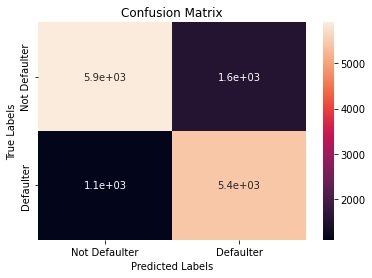

In [96]:
#plotting confusion matrix
ax= plt.subplot()
sns.heatmap(CM, annot=True, ax = ax)

# labels, title and ticks
labels = ['Not Defaulter', 'Defaulter']
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**Feature Importance**

In [97]:
features = new_df.drop('default',axis=1)
importances = optimized_rf_model.feature_importances_
feature_imp = pd.Series(importances,index=features.columns).nlargest(10, keep = 'first')
feature_imp

paid_total            0.124952
total_bill            0.117926
Dues                  0.113336
cred_lim              0.101024
AGE                   0.092096
repay_status_aug_1    0.030719
repay_status_sep_2    0.029601
marriage_Married      0.023287
repay_status_jul_1    0.022134
repay_status_sep_0    0.021716
dtype: float64

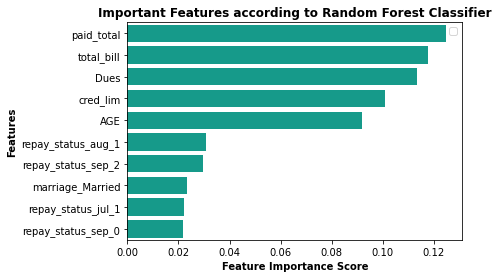

In [98]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index, color = '#00b09b')
# Add labels to the graph
plt.xlabel('Feature Importance Score', weight = 'bold')
plt.ylabel('Features', weight = 'bold')
plt.title("Important Features according to Random Forest Classifier", weight = 'bold')
plt.legend()
plt.show()

# **Support Vector Machine (SVM)**

---

Steps involved:

Support Vector Classifier Generator

Evaluating the model using Accuracy, Precision, Recall and Confusion Matrix



In [99]:
svc_model = SVC(kernel = 'linear', C = 2)

In [100]:
svc_model.fit(X_train, y_train)

SVC(C=2, kernel='linear')

In [101]:
#evaluate the model on train data
y_pred_train = svc_model.predict(X_train)

accuracy_score_train = accuracy_score(y_pred_train,y_train) *100
precision_score_train = precision_score(y_pred_train,y_train) *100
recall_score_train = recall_score(y_pred_train,y_train) *100

print("The accuracy on train data is ", accuracy_score_train)
print("The precision on train data is ", precision_score_train)
print("The recall on train data is ", recall_score_train)

#confusion matrix
CM = confusion_matrix(y_pred_train,y_train)
print(f"Confusion Matrix : \n {CM}")

The accuracy on train data is  75.13834112935278
The precision on train data is  67.96330275229357
The recall on train data is  79.3374268170784
Confusion Matrix : 
 [[13465  5238]
 [ 2894 11112]]


In [102]:
#evaluate the model on test data
y_pred_test = svc_model.predict(X_test)

accuracy_score_test = accuracy_score(y_pred_test,y_test) *100
precision_score_test = precision_score(y_pred_test,y_test) *100
recall_score_test = recall_score(y_pred_test,y_test) *100

print("The accuracy on test data is ", accuracy_score_test)
print("The precision on test data is ", precision_score_test)
print("The recall on test data is ", recall_score_test)

#confusion matrix
CM = confusion_matrix(y_pred_test,y_test)
print(f"Confusion Matrix : \n {CM}")

The accuracy on test data is  74.4632284756402
The precision on test data is  67.37952666096379
The recall on test data is  78.53107344632768
Confusion Matrix : 
 [[5713 2288]
 [1292 4726]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

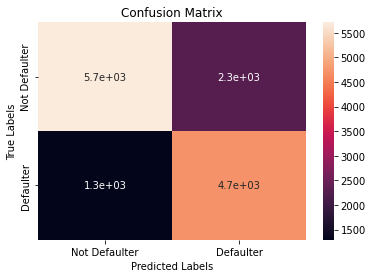

In [103]:
#plotting confusion matrix
ax= plt.subplot()
sns.heatmap(CM, annot=True, ax = ax)

# labels, title and ticks
labels = ['Not Defaulter', 'Defaulter']
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **Summerizing scores of all models**

---



**Let us create a table containing all models which we have evaluated with their metric scores.**

In [104]:
#Defining all the models
models = [
           ['Logistic Regression', optimized_lr_model],
           ['Decision Tree', optimized_dt_model],
           ['Random Forest', optimized_rf_model],
           ['Support Vector Machine (SVM)', svc_model]                   
        ]

In [105]:
#Let us run all the models and store the scores
model_data = []
for model_name,curr_model in models :
    curr_model_data = {}
    curr_model_data["Name"] = model_name
    curr_model.fit(X_train,y_train)
    curr_model_data["Accuracy_train"] = accuracy_score(curr_model.predict(X_train),y_train) *100
    curr_model_data["Accuracy_test"] = accuracy_score(curr_model.predict(X_test),y_test) *100

    curr_model_data["Precision_train"] =precision_score(curr_model.predict(X_train),y_train) *100
    curr_model_data["Precision_test"] =precision_score(curr_model.predict(X_test),y_test) *100

    curr_model_data["Recall_train"] = recall_score(curr_model.predict(X_train),y_train) *100
    curr_model_data["Recall_test"] = recall_score(curr_model.predict(X_test),y_test) *100

    curr_model_data["F1_score_train"] = f1_score(curr_model.predict(X_train), y_train) *100
    curr_model_data["F1_score_test"] = f1_score(curr_model.predict(X_test),y_test) *100

    model_data.append(curr_model_data)

In [106]:
#printing the results dataframe
results_df = pd.DataFrame(model_data)
results_df

,Name,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,F1_score_train,F1_score_test
0,Logistic Regression,75.236174,74.563093,68.733945,68.078129,78.996204,78.253032,73.508634,72.811833
1,Decision Tree,70.252836,68.999215,70.990826,70.259481,69.946969,68.558709,70.465032,69.398676
2,Random Forest,99.302944,80.676225,98.844037,77.445110,99.759259,82.817503,99.299539,80.041258
3,Support Vector Machine (SVM),75.138341,74.463228,67.963303,67.379527,79.337427,78.531073,73.211227,72.529159



Let us understand these metrics of evaluation of the models -


|**Metric**|**Definition**|**Meaning in this context**|
|--- |--- |--- |
|**Accuracy**|The proportion of the total number of predictions that are correct|Overall how often the model predicts correctly defaulters and non-defaulters|
|**Precision**|The proportion of positive predictions that are actually correct|When the model predicts default, how often is correct?|
|**Recall**|The proportion of positive observed values correctly predicted as such|The proportion of actual defaulters that the model will correctly predict as such|


---

# **Which Metric should we use?**

---


*   **False Positive:** A person who will pay, predicted as defaulters

*   **False Negative:** A person who default, predicted as payer

**In this case, false negatives are worse ➡ look for a better recall**


> **Among all 4 models which we tried to build here to predict defaulters correctly, Random Forest is the best and robust model with 82% recall score, which is very good.**





# **ROC curve**

The area under the ROC curve tells us how well the model separates the different classes in the dataset. It plots true positive rate against false positive rate.

ROC AUC score =  0.8851132139717709


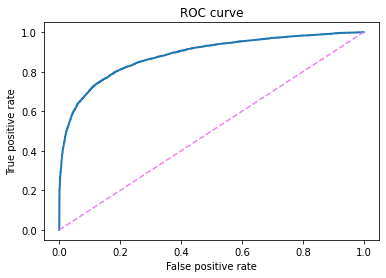

In [107]:
fpr, tpr, thresholds = roc_curve(y_test, optimized_rf_model.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_test, optimized_rf_model.predict_proba(X_test)[:,1]))

**We’re calculating the area between the blue curved line and pink dotted line. This area is a number between 0 and 1, zero meaning the model predicted all of the data incorrectly, and one meaning the model predicted all of the data correctly. Our model is pretty good at 0.8851.**

# **Conclusions**

---

1. According to RandomForest model, features like **paid_total, total_bill, dues, cred_lim, age, repay_status_sep_2, repay_status_aug_1 and marriage status as married** are found to be **most important features to predict future defaulters.**

2. If the credit card holder has paid minimum credit amount for past 6 months, also for every month if the dues of that customers are increasing, then it is obvious that the customer will have default for sure!

3. While this age and limit_bal are the other two important predictors as we discussed in the data preparation part. This also makes sense because as one gets older, one is more likely to accumulate more resource and cares more about his reputations, which makes credit default less likely. Also, if one and one’s family get more given credits, the person is more likely to live in a wealthier environment which also makes credit default less likely.

4. Further, repay status is also playing a vital role in predicting future defaulters. If the creditor is not repaying for the past one or more months, he is more likely to default in upcoming months.

At the end of the day, having the ability to predict 82% (recall score) of potential defaults would save a-lot of money on credit card charge-offs. Obviously, real-world application is more nuanced, but this modeling process is a step in the right direction.

# **Reflection**

---



>One important way that I think the predictive model could be improved is the enhancement of the data source. There are still lots of information that the data didn’t cover. For example, the current economic conditions of one person, like incomes and jobs of creditors; the amount of non-liquid assets owned by the creditors, and so on. This imperfection of the dataset determined that the model would lose some predicted power and are facing more uncertainty.

# **THANK YOU !**

---

